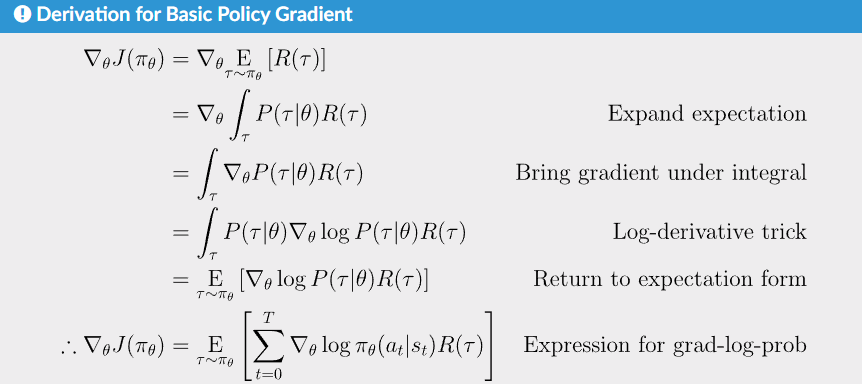

In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from policy_gradient import DEVICE, PolicyNetwork, evaluate_policy, train_one_episode
from plot_utils import plot_durations, plot_states_over_time, setup_matplotlib

In [8]:
train_env = gym.make('CartPole-v1', render_mode='rgb_array')
test_env = gym.make('CartPole-v1', render_mode='human')
state_size = train_env.observation_space.shape[0]
action_size = train_env.action_space.n
policy = PolicyNetwork(state_size, action_size).to(DEVICE)
optimizer = torch.optim.Adam(policy.parameters(), lr=0.001)

Reached reward threshold in 535 episodes
Complete


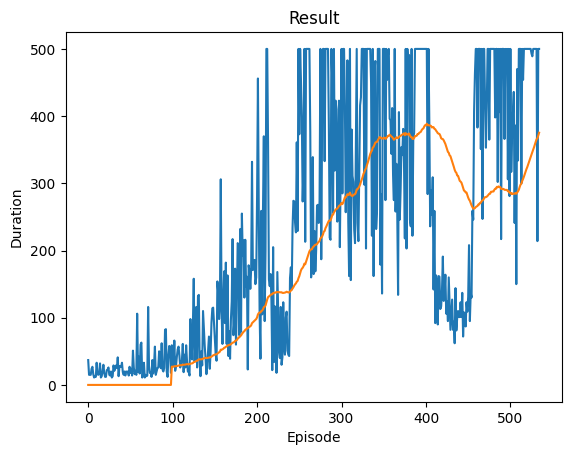

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# set up matplotlib
setup_matplotlib()

episode_durations = []

MAX_EPISODES = 1000
DISCOUNT_FACTOR = 0.99
N_TRIALS = 25
REWARD_THRESHOLD = 475
PRINT_EVERY = 10

train_rewards = []

for episode in range(1, MAX_EPISODES + 1):
    train_reward, loss = train_one_episode(train_env, policy, optimizer, DISCOUNT_FACTOR)

    train_rewards.append(train_reward)
    episode_durations.append(train_reward)

    mean_train_rewards = np.mean(train_rewards[-N_TRIALS:])

    plot_durations(episode_durations)

    if mean_train_rewards >= REWARD_THRESHOLD:
        print(f'Reached reward threshold in {episode} episodes')
        break

print('Complete')
plot_durations(episode_durations, show_result=True)
plt.ioff()
plt.show()

train_env.close()

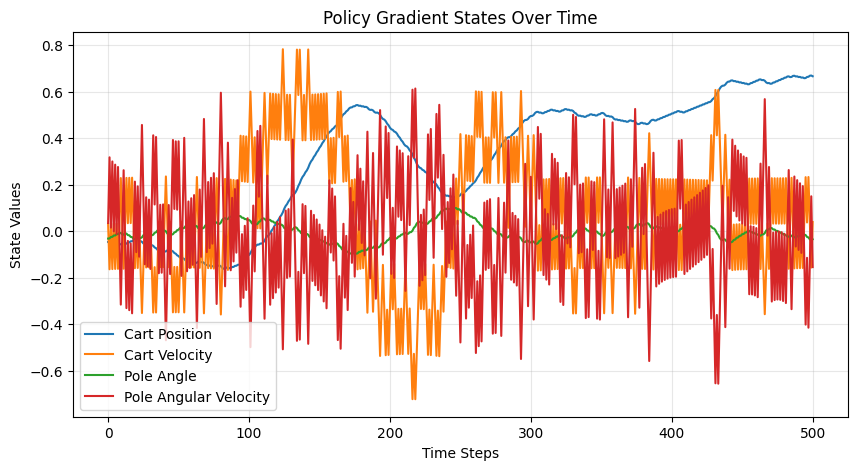

In [11]:
# Run one episode to capture states for visualization
state_history = []
state, info = test_env.reset()

terminated = False
while not terminated:
    state_history.append(state)
    state_tensor = torch.tensor(state, dtype=torch.float32, device=DEVICE).unsqueeze(0)

    with torch.no_grad():
        action_probs = policy(state_tensor)
        action = torch.argmax(action_probs, dim=1).item()

    state, reward, terminated, truncated, _ = test_env.step(action)
    terminated = terminated or truncated

state_history.append(state)

# Plot the states over time
state_history = np.array(state_history)
plot_states_over_time(state_history, title='Policy Gradient States Over Time')
test_env.close()